In [71]:
def subsidize(money):
    sub = (money - 400)/3
    
    if sub > 400:
        sub = 400

    if sub < 0:
        sub=0

    return sub

subsidize(1500)

366.6666666666667

In [72]:
def normal(day, fee=41.6):
    money = day * 2 * fee
    return money - subsidize(money)

normal(20)

1264.0

In [73]:
def normal_wo_subsidize(day, fee=41.6):
    money = day * 2 * fee
    return money

normal_wo_subsidize(20)

1664.0

In [79]:
# MTR early bird discount: https://www.mtr.com.hk/ch/customer/main/early_bird.html
def early_bird(day, fee=41.6, rate=0.25):
    money = day * fee + day * fee * (1 - rate)
    return money - subsidize(money)

early_bird(20)

1104.0

In [75]:
# MTR early bird discount: https://www.mtr.com.hk/ch/customer/main/early_bird.html
def early_bird_wo_subsidize(day, fee=41.6, rate=0.25):
    money = day * fee + day * fee * (1 - rate)
    return money

early_bird_wo_subsidize(20)

1456.0

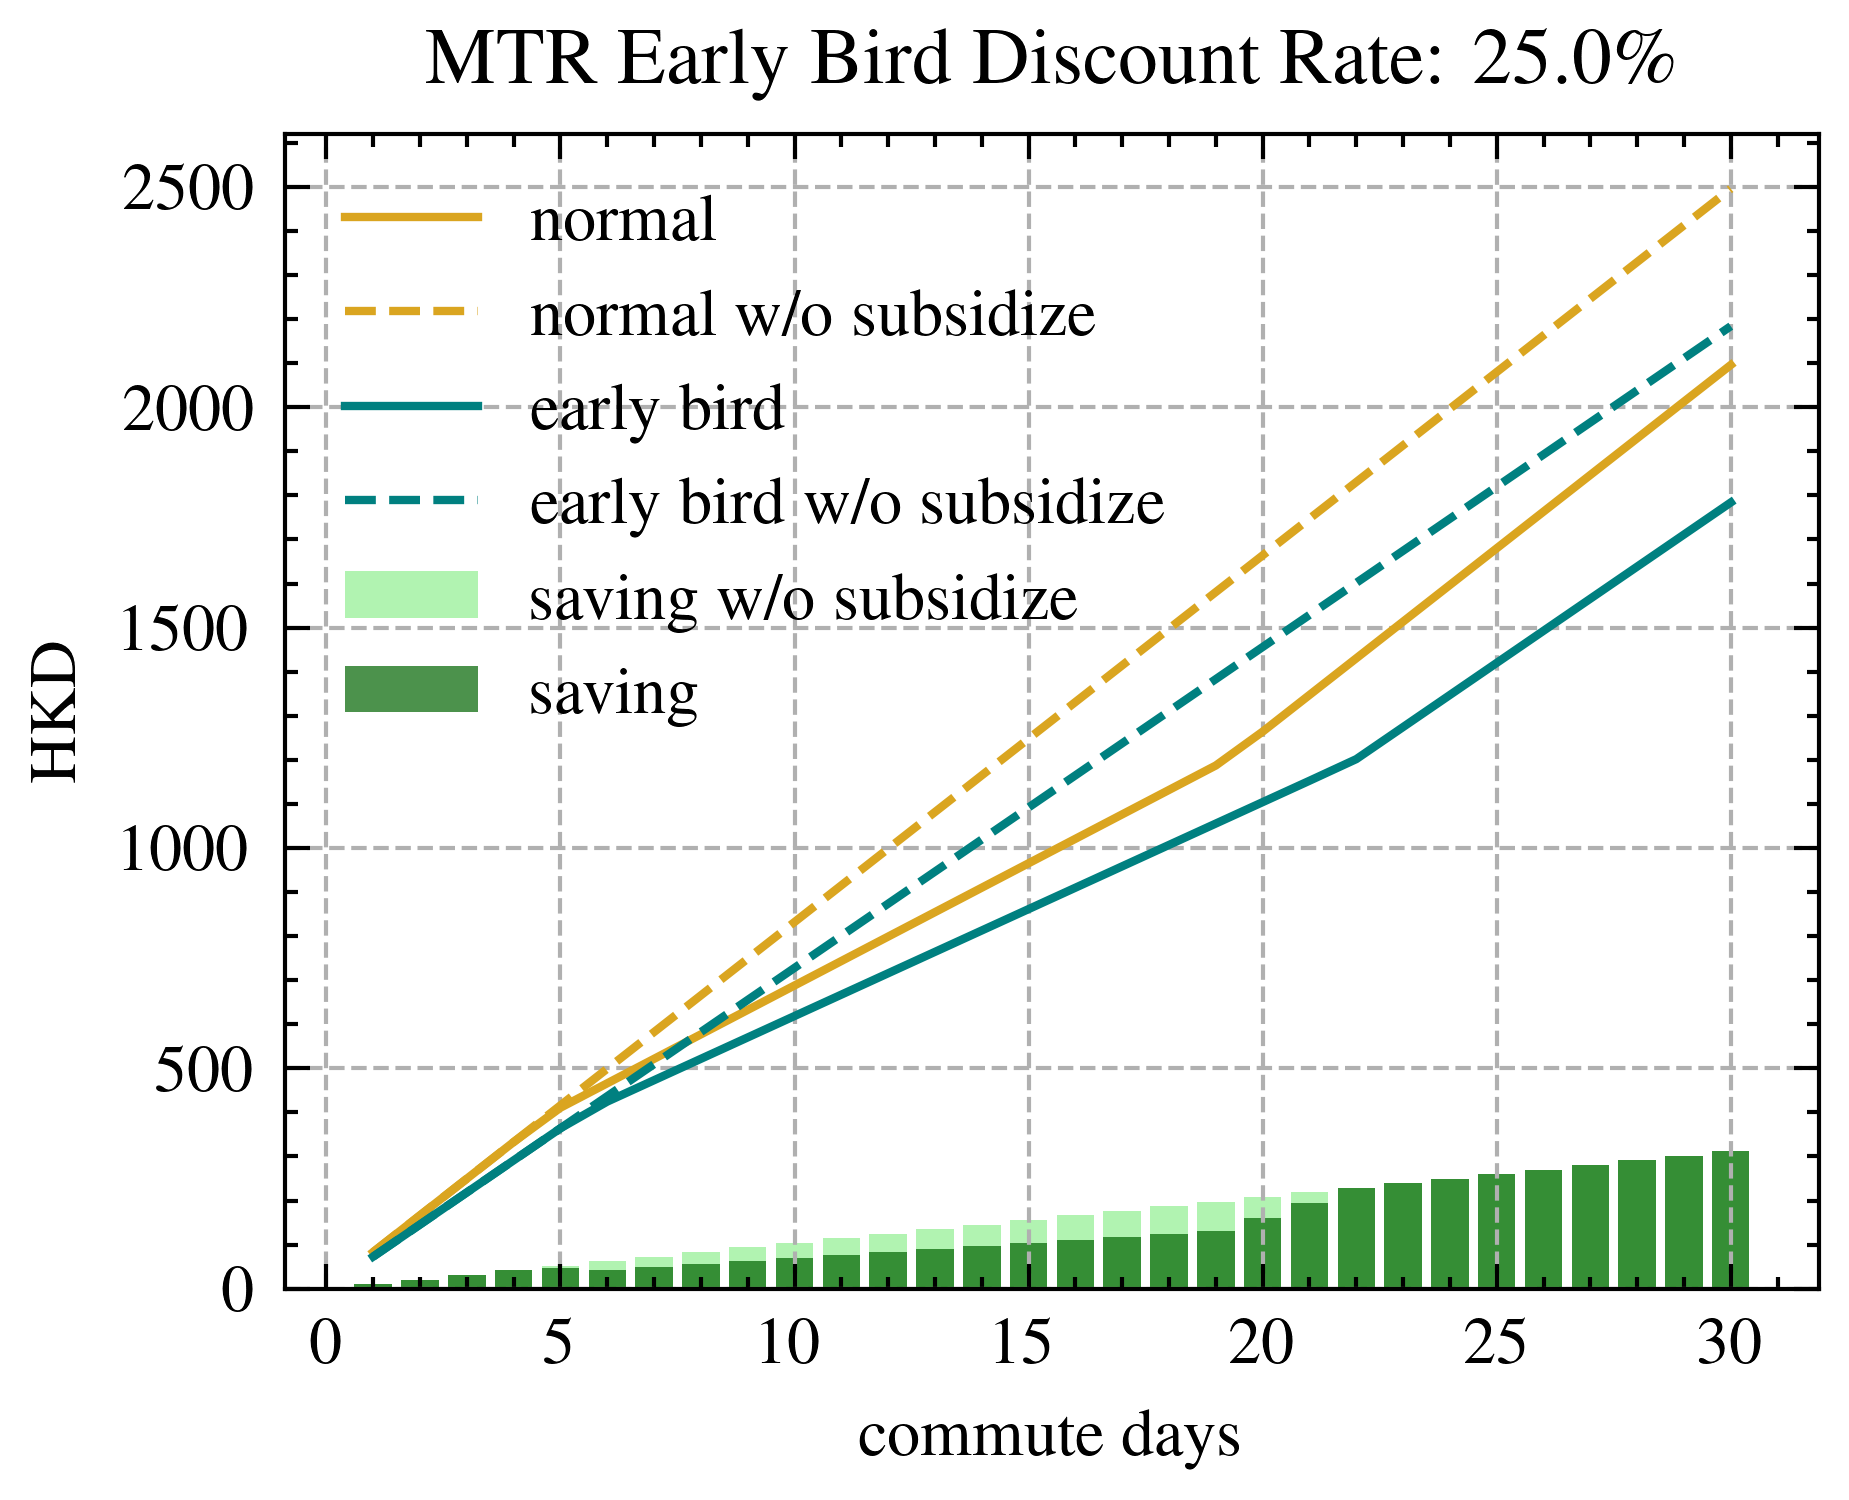

In [89]:
from matplotlib import pyplot as plt
import scienceplots
plt.style.use(['ieee'])

rate = 0.25

days = range(1, 31)
normals = [normal(day) for day in days]
normals_wo_subsidize = [normal_wo_subsidize(day) for day in days]
early_birds = [early_bird(day, rate=rate) for day in days]
erarly_birds_wo_subsidize = [early_bird_wo_subsidize(day) for day in days]
discounts = [normal(day) - early_bird(day, rate=rate) for day in days]
discounts_wo_subsidize = [normal_wo_subsidize(day) - early_bird_wo_subsidize(day, rate=rate) for day in days]

plt.plot(days, normals, label='normal', color='goldenrod')
plt.plot(days, normals_wo_subsidize, label='normal w/o subsidize', color='goldenrod', linestyle='--')
plt.plot(days, early_birds, label='early bird', color='teal', linestyle='-')
plt.plot(days, erarly_birds_wo_subsidize, label='early bird w/o subsidize', color='teal', linestyle='--')
plt.bar(days, discounts_wo_subsidize, label='saving w/o subsidize', color='lightgreen', alpha=0.7)
plt.bar(days, discounts, label='saving', color='darkgreen', alpha=0.7)

# plt.grid(linestyle='--')
plt.title(f'MTR Early Bird Discount Rate: {rate * 100}\%')
plt.xlabel('commute days')
plt.ylabel('HKD')
plt.legend()
plt.savefig(f'output/mtr-early-bird-{rate}.pdf')
plt.savefig(f'output/mtr-early-bird-{rate}.png')
plt.show()

In [77]:
print(discounts[8])

628.5958333333334
